En este problema se simulará la ocurrencia de eventos para un proceso Poisson con una tasa de ocurrencia (lambda=5/h) en el intervalo (t=3h).

El código lo que hace es usar el hecho de que puedo generar una variable Poisson a partir de otra variable que sigue la distribución exponencial con el mismo parámetro lambda. Ésta otra variable determina los "saltos" en la recta numérica que delimita el intervalo que yo quiera.

Hago un doble loop para generar los valores de la variable Poisson usando la generación de la otra variable aleatoria

In [1]:
%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt
from math import factorial
# Estilo de gráficos
plt.style.use('dark_background')

In [2]:
# Estilo de gráficos
plt.style.use('dark_background')

In [3]:
def Gen_Poisson(tasa, size, time=1):
    """ Devuelve un arreglo con una variable Poisson
    
    Parameters
    ----------
    tasa : .float
        Tasa de eventos Poisson. Debe ser positiva
    size : int
        Tamaño del arreglo, Debe ser positivo
    time : .float
        Tiempo observado. Default = 1
        
    Returns
    -------
    N : list
        Arreglo de una variable Poisson
        
    """
    # Errores
    if size<0:
        raise ValueError('Error, el argumento size debe ser un entero positivo')
    if tasa<0:
        raise ValueError('Error, la tasa debe ser un real positivo')
    # -------
    import numpy as np
    from math import factorial
    N = [] # Variable aleatoria tipo Poisson
    ij = 0
    while ij<size: # Loop para generar "size" valores de N
        x = np.random.exponential(scale=time/tasa, size=size)
        CS = np.cumsum(x)
        ik = 0
        while ik<size: # Loop para calcular el valor de N usando los saltos
            S = CS[ik] # Exploro la suma acumulada de saltos
            if S>time: # Cuando me paso del intervalo pedido cuento los eventos
                N.append( len(x[:ik]) )
                break
            ik = ik + 1
        ij = ij + 1
    return N

In [4]:
# Genero la variable Poisson con mi función
Ns = Gen_Poisson(tasa=5, size=10000, time=3)

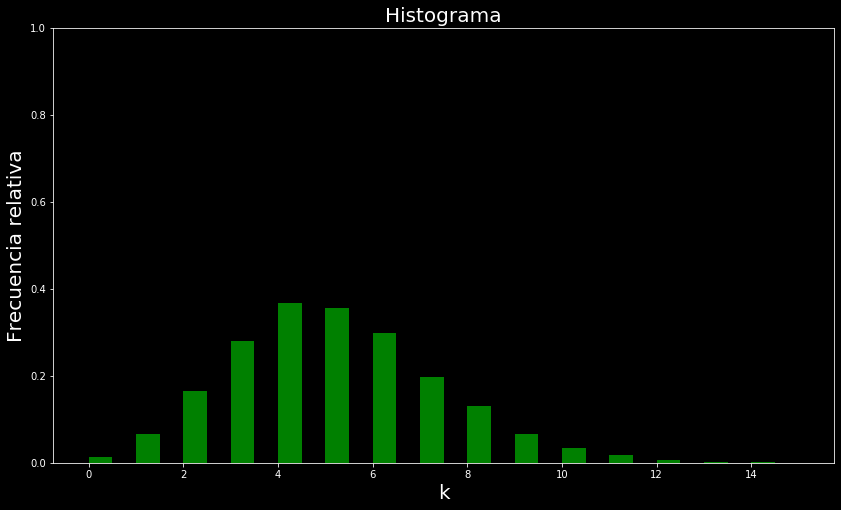

In [5]:
# Histograma
fig, ax = plt.subplots(1, 1, figsize = (14,8))

ax.hist(Ns, color='green', density=True, bins=30)

ax.set_title('Histograma', fontsize=20)
ax.set_ylim(0,1)
ax.set_xlabel('k', fontsize=20)
ax.set_ylabel('Frecuencia relativa', fontsize=20);